In [9]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Load dataset
df_mushroom_dataset = pd.read_csv('mushroom_cleaned.csv')
X = df_mushroom_dataset.drop(columns=['class'])
y = df_mushroom_dataset['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:

# Function for evaluating kNN
def evaluate_knn(X_train, X_test, y_train, y_test, scaled=True):
    best_k = None
    best_accuracy = 0
    print(f"\nkNN Results ({'Scaled' if scaled else 'Unscaled'} Data):")
    for k in range(1, 11):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"k = {k}, Accuracy = {accuracy:.2f}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
    print(f"Best k: {best_k} with accuracy: {best_accuracy:.2f}")
    return KNeighborsClassifier(n_neighbors=best_k).fit(X_train, y_train)


In [11]:

# Function for evaluating SVM
def evaluate_svm(X_train, X_test, y_train, y_test, scaled=True):
    print(f"\nSVM Results ({'Scaled' if scaled else 'Unscaled'} Data):")
    for kernel in ['linear', 'rbf', 'poly']:
        svm = SVC(kernel=kernel)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Kernel: {kernel}, Accuracy = {accuracy:.2f}")
    return svm  # Return the last trained model for further use



In [12]:
# Evaluate kNN
knn_scaled = evaluate_knn(X_train_scaled, X_test_scaled, y_train, y_test, scaled=True)
knn_unscaled = evaluate_knn(X_train, X_test, y_train, y_test, scaled=False)

# Evaluate SVM
svm_scaled = evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, scaled=True)



kNN Results (Scaled Data):
k = 1, Accuracy = 0.99
k = 2, Accuracy = 0.99
k = 3, Accuracy = 0.99
k = 4, Accuracy = 0.99
k = 5, Accuracy = 0.99
k = 6, Accuracy = 0.99
k = 7, Accuracy = 0.99
k = 8, Accuracy = 0.99
k = 9, Accuracy = 0.99
k = 10, Accuracy = 0.99
Best k: 6 with accuracy: 0.99

kNN Results (Unscaled Data):
k = 1, Accuracy = 0.73
k = 2, Accuracy = 0.71
k = 3, Accuracy = 0.72
k = 4, Accuracy = 0.71
k = 5, Accuracy = 0.72
k = 6, Accuracy = 0.71
k = 7, Accuracy = 0.72
k = 8, Accuracy = 0.72
k = 9, Accuracy = 0.71
k = 10, Accuracy = 0.72
Best k: 1 with accuracy: 0.73

SVM Results (Scaled Data):
Kernel: linear, Accuracy = 0.64
Kernel: rbf, Accuracy = 0.91
Kernel: poly, Accuracy = 0.76


In [13]:

# Plot confusion matrices
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Edible", "Poisonous"]).plot()
    plt.title(title)
    plt.show()


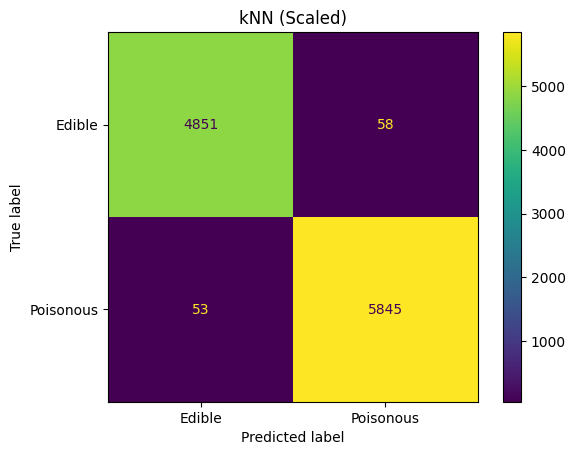

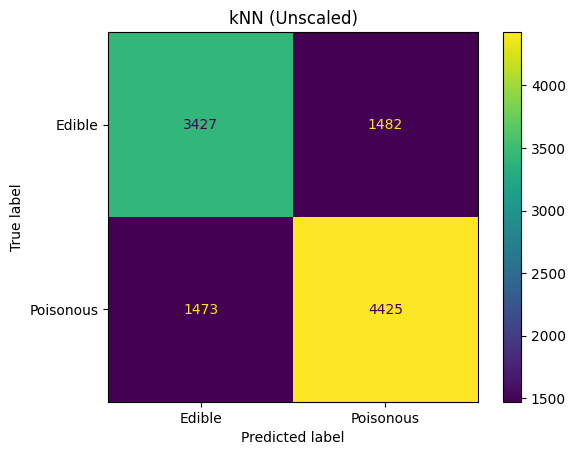

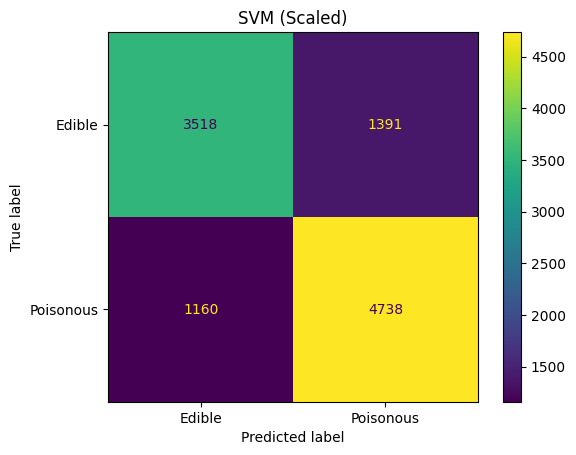

In [14]:

# Plot confusion matrices for best models
plot_confusion_matrix(knn_scaled, X_test_scaled, y_test, "kNN (Scaled)")
plot_confusion_matrix(knn_unscaled, X_test, y_test, "kNN (Unscaled)")
plot_confusion_matrix(svm_scaled, X_test_scaled, y_test, "SVM (Scaled)")


In [15]:

# GridSearch for SVM with scaling
print("\nGrid Search for SVM (Scaled):")
parameters = {'kernel': ('linear', 'rbf'), 'C': [1, 10]}
clf = GridSearchCV(SVC(), parameters)
clf.fit(X_train_scaled, y_train)
print(f"Best parameters: {clf.best_params_}, Best score: {clf.best_score_:.2f}")




Grid Search for SVM (Scaled):
Best parameters: {'C': 10, 'kernel': 'rbf'}, Best score: 0.95
